<a href="https://colab.research.google.com/github/daretoosint/AML/blob/main/AML_Detection_via_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras

In [ ]:
path="/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv"


In [ ]:
# MOUNTING FROM GOOGLE DRIVE
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv")

**Data Exploration**

In [ ]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


**Analysis** - Possible Red Flags:
1. If different originator are doing various types of transactions with only one particular beneficiary, then chances that the beneficiary is a mule account or involved in money laundering activities
2. if there is MORE cash transaction with only one particular account, then there is a high chance of money laundering
3. large volume of transaction, in particular, account = chance of money laundering

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
# data is imbalanced and highly scaled
print("max amount", data ['amount'].max ())
print("min amount", data ['amount'].min())

max amount 92445516.64
min amount 0.0


In [ ]:
ML_df= data[data['isFraud']== 1]
NoML_df= data[data['isFraud']== 0]

print("Total No of Transactions =", len(data['isFraud']))

print("Total No of identified Money Laundered Transactions =", len(ML_df))
print("Percentage of identified Money Laundered Transactions =", 1.*len(ML_df)/len(data['isFraud'])*100.0,"%")

Total No of Transactions = 6362620
Total No of identified Money Laundered Transactions = 8213
Percentage of identified Money Laundered Transactions = 0.12908204481801522 %


In [ ]:
print("Total No of not Money Laundering Transactions =", len(NoML_df))
print("Percentage of not Money Laundering Transactions =", 1*len(NoML_df)/len(data['isFraud'])*100.0, "%" )

Total No of not Money Laundering Transactions = 6354407
Percentage of not Money Laundering Transactions = 99.87091795518198 %


**Data Visualisation**

<Axes: >

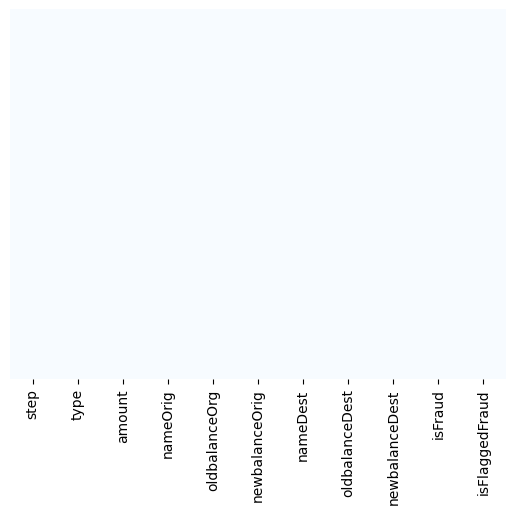

In [ ]:
# CHECK IF THERE IS ANY MISSING DATA
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap ="Blues")

In [ ]:
# CHECK IF THERE IS RELATIONSHIP BETWEEN TYPES OF TRANSACTION AND ML TRANSACTION
data['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

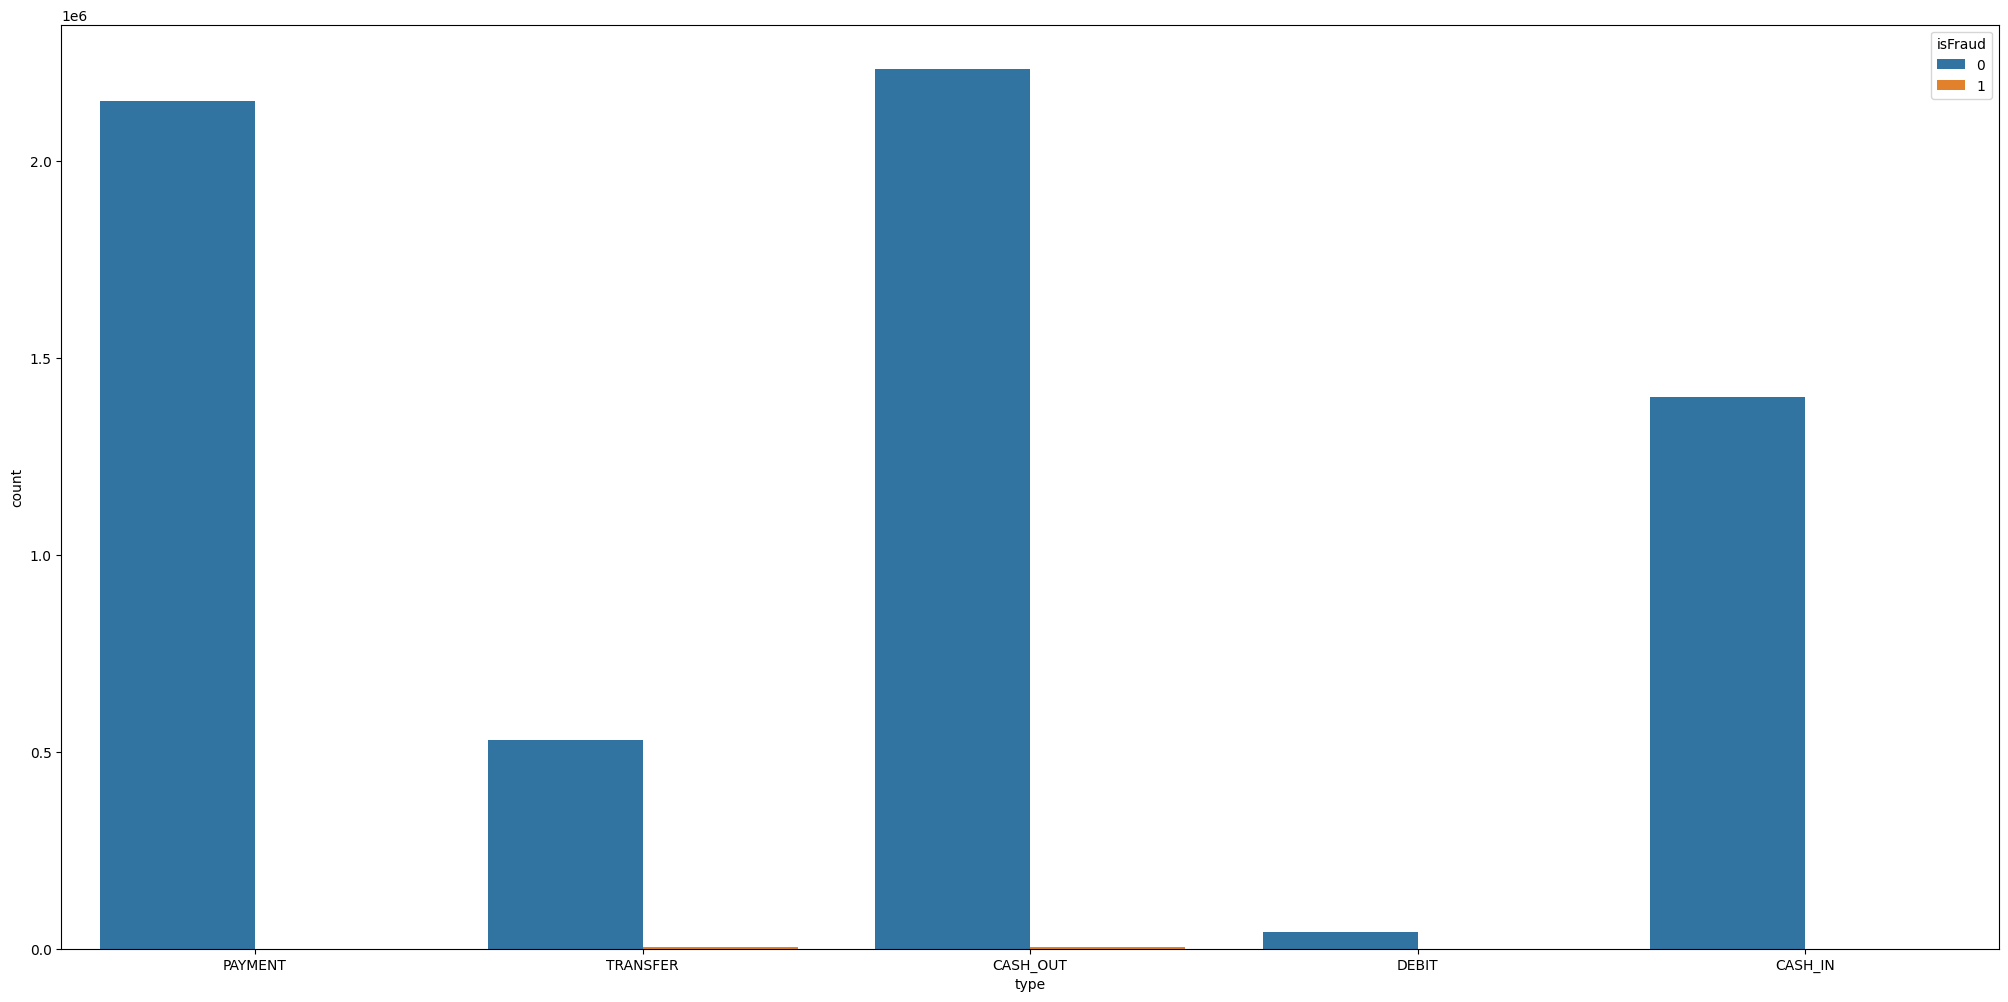

In [ ]:
# CHECK IF THERE IS ANY RELATIONSHIP OF ML TRANSACTION WITH PARTICULAR TYPE OF TRANSACTION
plt.figure(figsize = [25,12])
sns.countplot(x = 'type', hue = 'isFraud' , data = data)

~ distplot combines the matplot.lib.hist function with seaborn kdeplot
~ KDE Plot represents the Kernel Density Estimate
~ KDE is used for visualising the Probability Density of a continous variable
~ KDE demonstrates the probability density at diff values in a continous variable


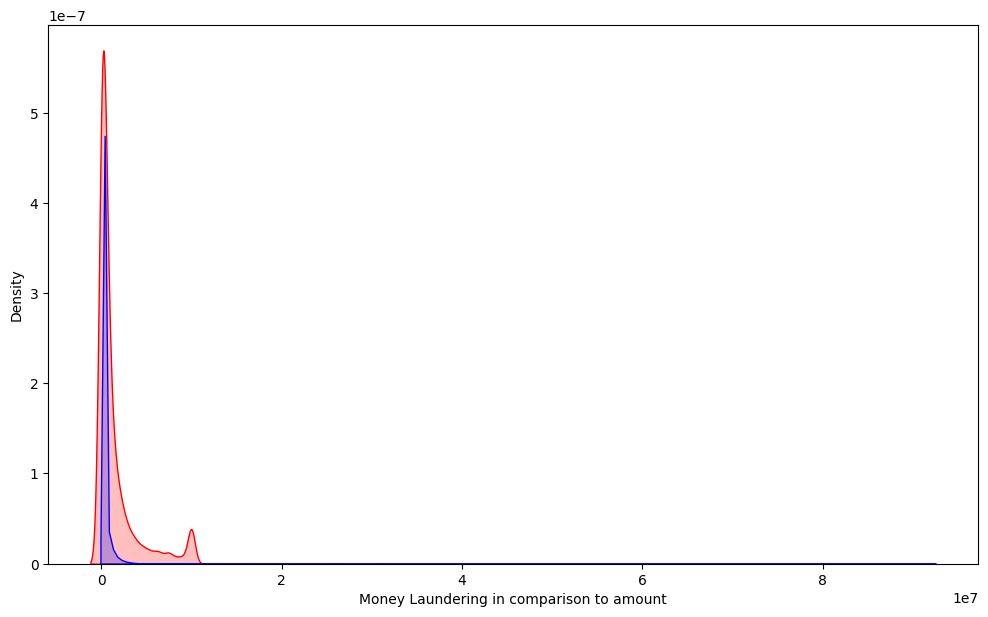

In [ ]:
plt.figure(figsize = (12, 7))

sns.kdeplot(ML_df['amount'], label = 'Money Laundered Transaction', fill = True, color = 'r')
sns.kdeplot(NoML_df['amount'], label = 'Not Money Laundered Transaction', fill = True, color = 'b')

plt.xlabel ('Money Laundering in comparison to amount')
Text = (0.5, 0, 'Money Laundering in comparison to amount')

*e8 is standard scientific notion, 2 actually indicates 2 *1e8 = 2*e8 = 2 * 10^7*



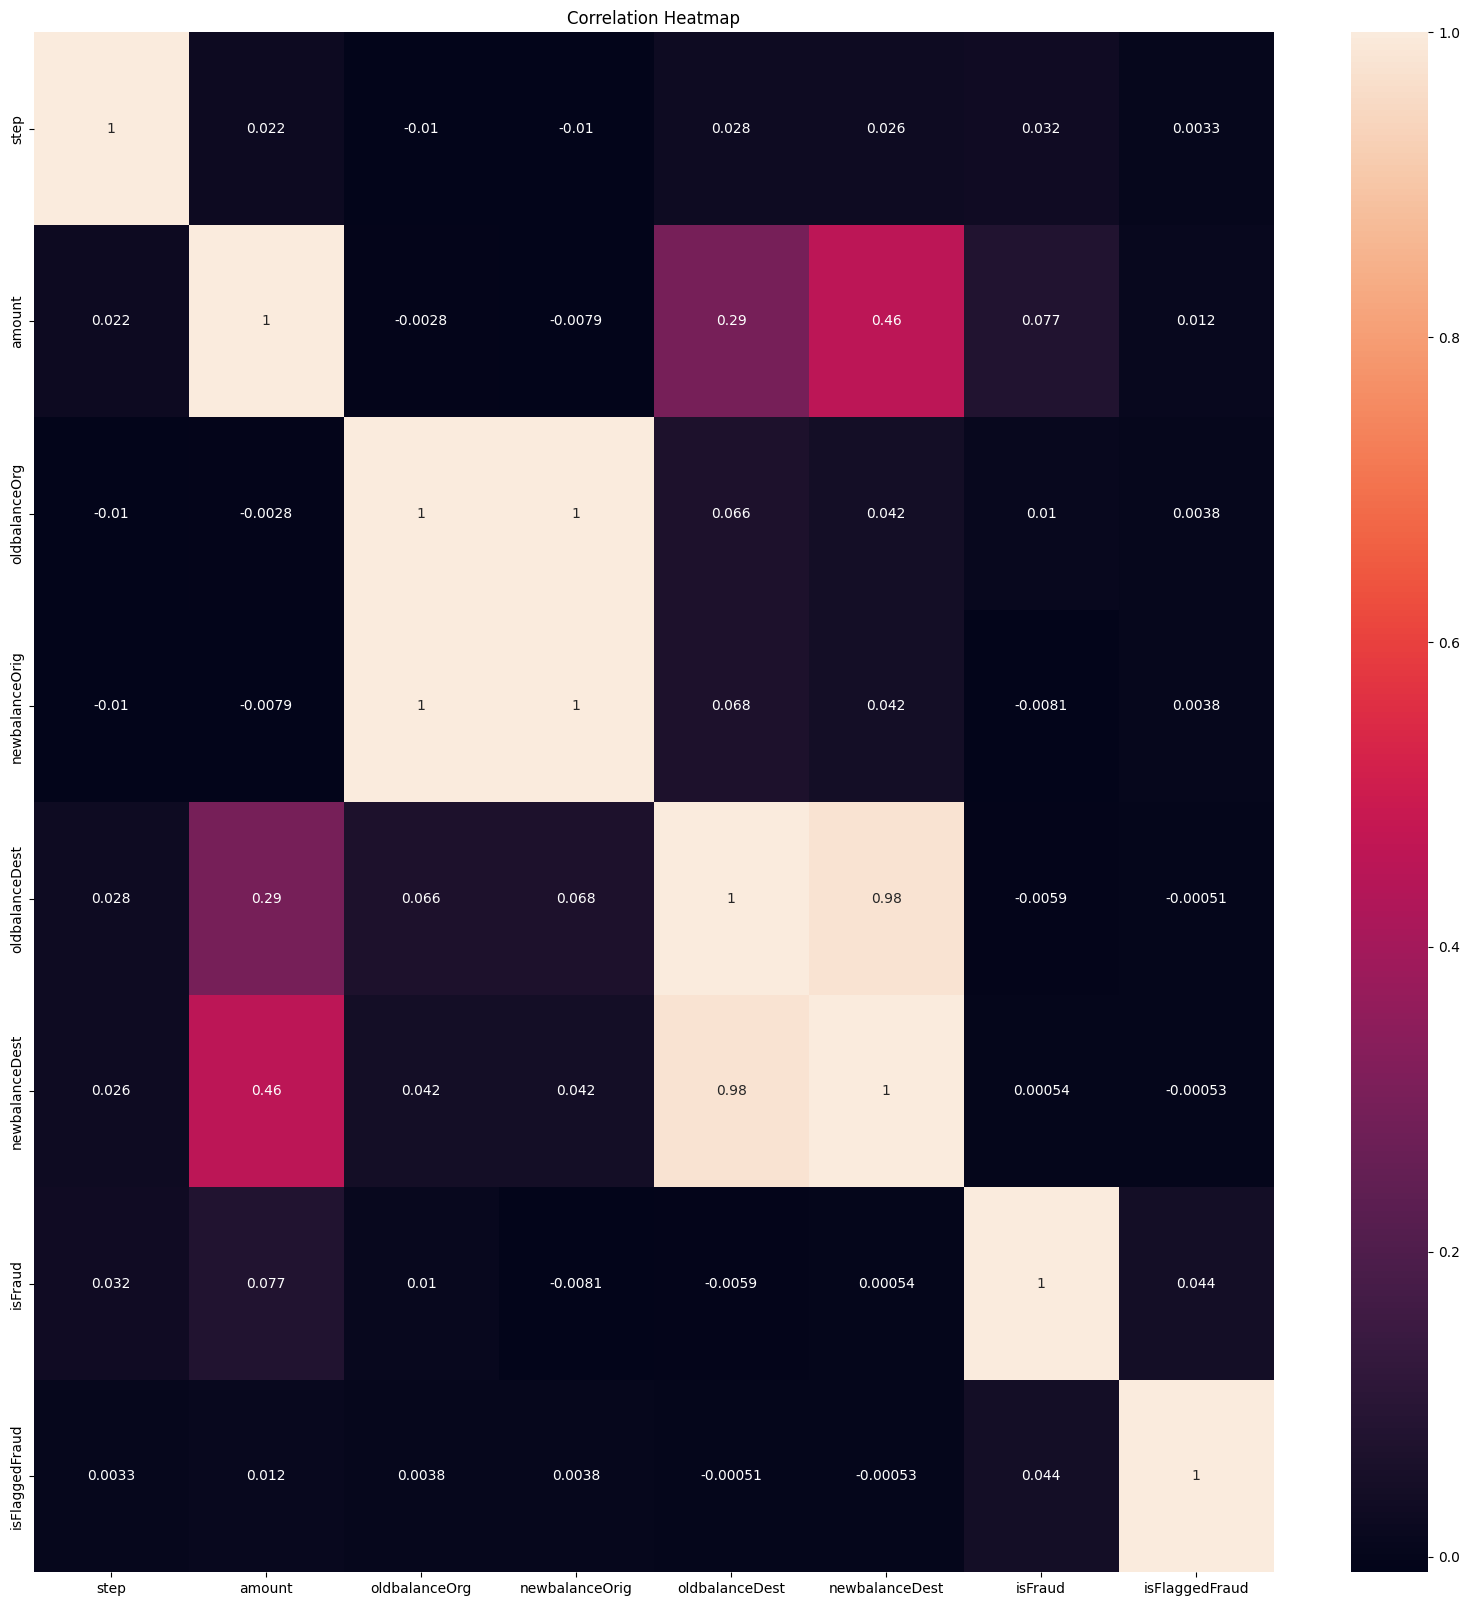

In [ ]:
# Example DataFrame
# data = pd.read_csv('your_data.csv') # Load your data here

# Convert all columns to numeric, coercing errors to NaN
numeric_data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows/columns with NaN values (optional)
numeric_data = numeric_data.dropna(axis=1, how='any')  # Drops columns with any NaN values

# Compute correlations
correlations = numeric_data.corr()

# Create a figure and a set of subplots
f, ax = plt.subplots(figsize=(20, 20))

# Draw the heatmap with the correct axes
sns.heatmap(correlations, annot=True, ax=ax)

# Add a title for better understanding
ax.set_title('Correlation Heatmap')

# Show the plot
plt.show()


*not so much correlation between variable, it would be recommended if features ie. KYC status, location transaction settled, transaction initiated, IP address are added*

**Preprocessing of Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
col_names = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
features = data[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

**Normalising and Standarise data**
*due to the high range of data*

One Hote Code Encoding (to cover string to numeric data)

In [ ]:
data_extract=data[['type','isFraud']]

type_dummies = pd.get_dummies(data_extract['type'], drop_first = True)
data_extract.drop(['type'], axis=1, inplace=True)
new_data=pd.concat([data_extract,type_dummies,scaled_features], axis=1, ignore_index = False)
new_data.head()

<ipython-input-35-b0813db08646>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_extract.drop(['type'], axis=1, inplace=True)


,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0,False,False,True,False,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411
1,0,False,False,True,False,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411
2,1,False,False,False,True,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411
3,1,True,False,False,False,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411
4,0,False,False,True,False,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411


<Axes: >

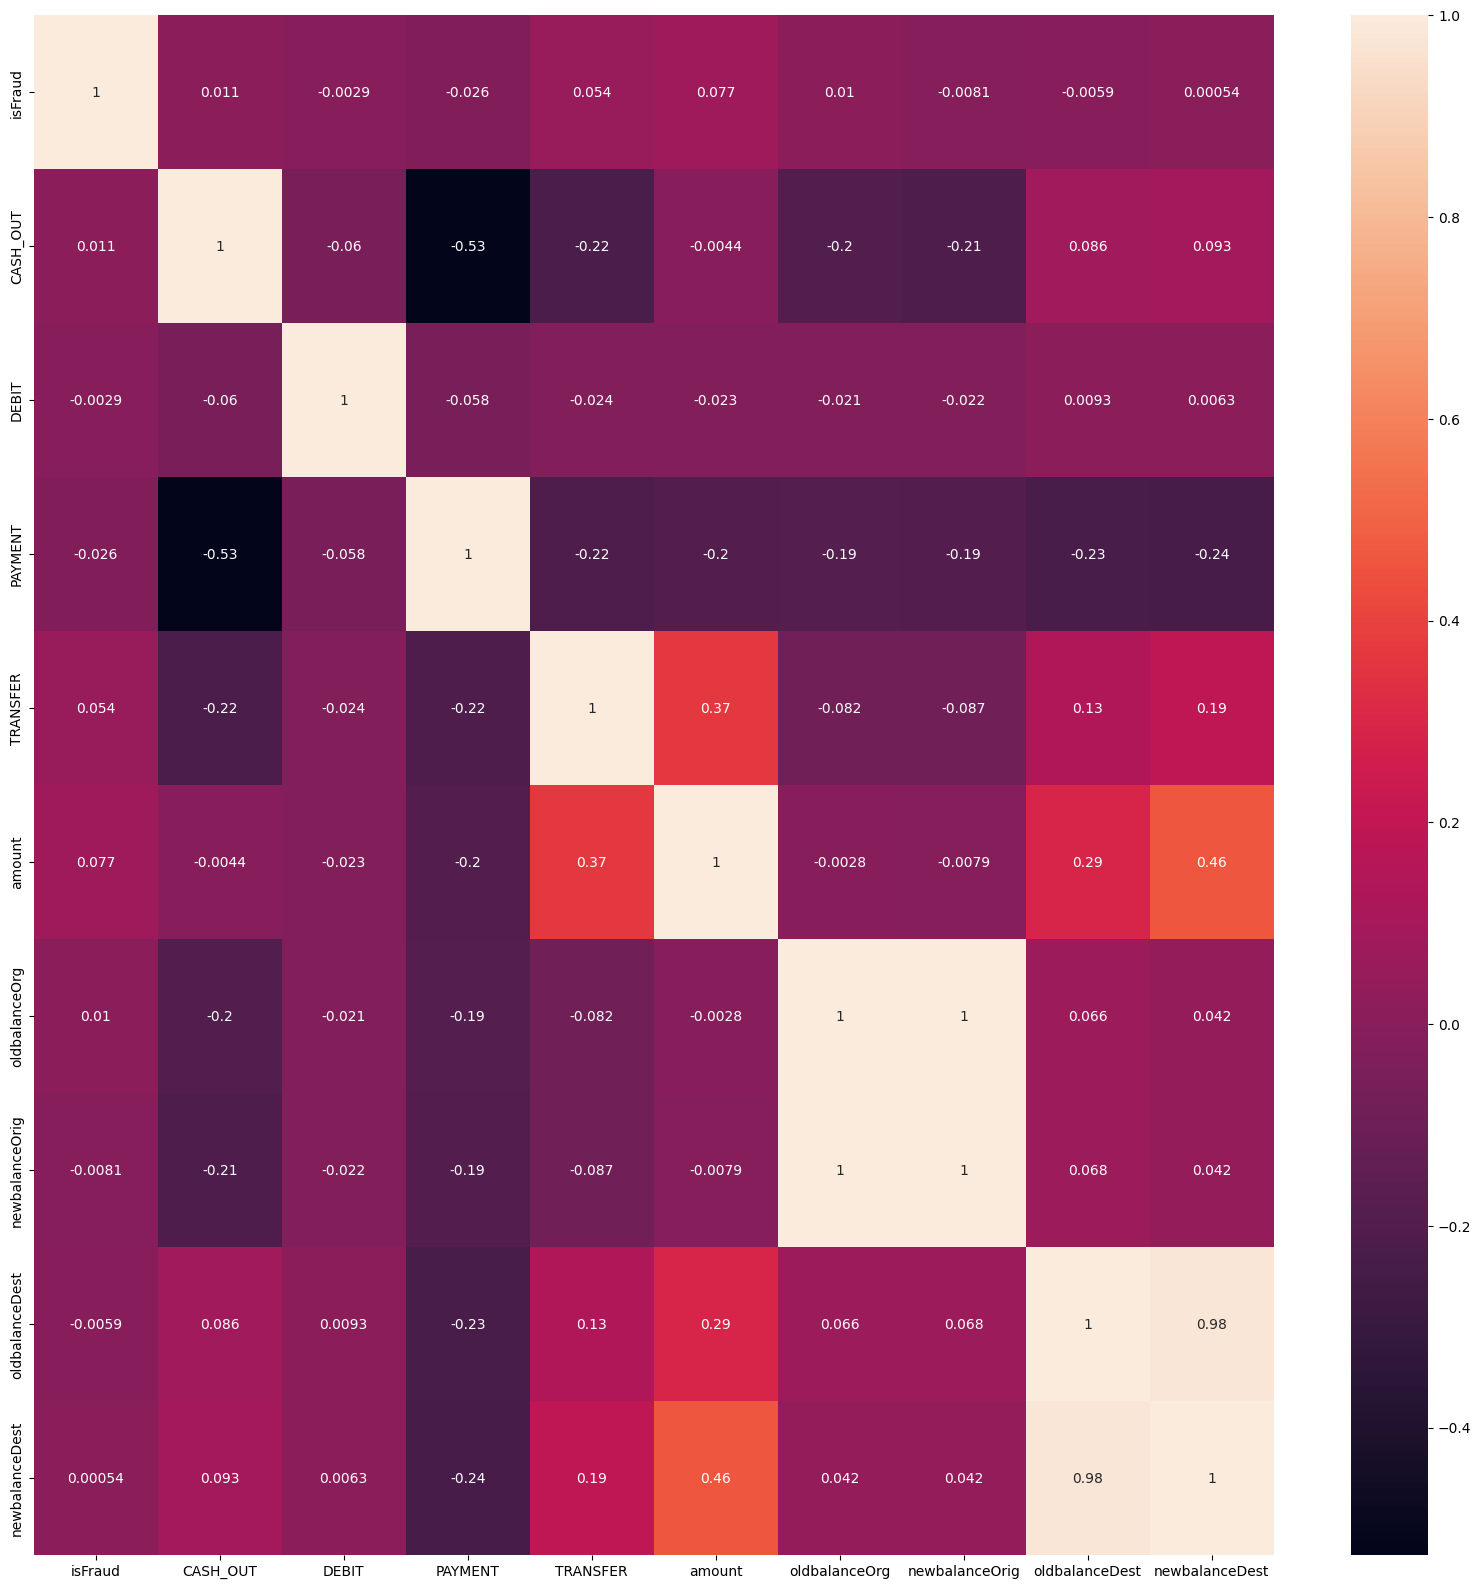

In [ ]:
correlations = new_data.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

*still no visible correlation.*

**TRAIN AND DEPLOYMENT OF MODEL**

In [ ]:
X = new_data.iloc[:, new_data.columns != 'isFraud']
Y = new_data.iloc[:, new_data.columns == 'isFraud']

In [ ]:
Y.head()

,isFraud
0,0
1,0
2,1
3,1
4,0


In [ ]:
X.head()

,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,False,False,True,False,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411
1,False,False,True,False,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411
2,False,False,False,True,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411
3,True,False,False,False,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411
4,False,False,True,False,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411


In [ ]:
# 1 = TRUE AND 0 = FALSE

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size = 0.3, random_state=0)

In [ ]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions Y_train dataset:", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions Y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (4453834, 9)
Number transactions Y_train dataset: (4453834, 1)
Number transactions X_test dataset:  (1908786, 9)
Number transactions Y_test dataset:  (1908786, 1)
